# Variational Auto Encoder `VAE`

## Import dependencies

In [1]:
import os
import sys
import datetime as dt

from PIL import Image

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data_dir = 'datasets/pokemon/'

In [22]:
def rgba2rgb(src, dest, color=(255, 255, 255)):
    if os.path.isdir(dest) and len(os.listdir(dest)) > 1:
        sys.stderr.write('{} already exist.'.format(dest))
        sys.stderr.flush()
        return
    os.makedirs(dest)
    files = os.listdir(src)
    for i, each in enumerate(files):
        try:
            png = Image.open(os.path.join(src,each))
            if png.mode == 'RGBA':
                png.load() # required for png.split()
                background = Image.new("RGB", png.size, color=color)
                background.paste(png, mask=png.split()[3]) # 3 is the alpha channel
                background.save(os.path.join(dest, each.split('.')[0] + '.jpg'), 'JPEG')
            else:
                png.convert('RGB')
                png.save(os.path.join(dest, each.split('.')[0] + '.jpg'), 'JPEG')
        except Exception as e:
            sys.stderr.write('{} – {}\n'.format(e, png.filename))
            os.unlink(os.path.join(dest, each.split('.')[0] + '.jpg'))
        finally:
            sys.stdout.write('\r{:,} of {:,}'.format(i+1, len(files)))

In [33]:
def preprocess(data_dir, save_dir='datasets/save', size=256):
#     if not os.path.isdir(save_dir):
#         os.makedirs(save_dir)
    imgs = []
    try:
        # convert rgba to rgb (with black background)
        rgba2rgb(data_dir, save_dir)
        # TODO: continue preprocessingss
        files = [os.path.join(save_dir, d) for d in os.listdir(save_dir)]
        for file in files[:1]:
            img = Image.open(file)
            img = img.resize(size=(size, size))
            img = np.array(img, dtype=np.float32)
            imgs.append(img)
    except Exception as e:
        sys.stderr.write('{}\n'.format(e))
    return np.array(imgs)

In [34]:
preprocess(data_dir)

datasets/save already exist.

In [27]:
test_img = Image.open('datasets/save/0.jpg')

In [29]:
test_img.size

(1280, 1280)

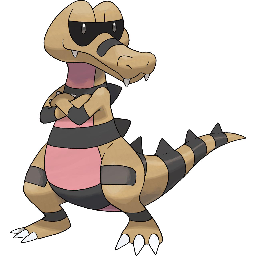

In [31]:
test_img.resize(size=(256, 256))

In [32]:
test_img.im.bands

3